# Laboration - Covid-19

---

## Uppgift 1

### a)

Inläsning av data:

In [2]:
import pandas as pd

covid19_cases = pd.read_excel("./Data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name="Veckodata Riket")

Utforskande av data:

In [3]:
covid19_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

In [4]:
covid19_cases.describe()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,2020.957746,26.035211,18378.345070,177.197183,354.169014,1.125288e+06,10843.281690,67.176056,6000.464789,144.936620,14.000000,12321.154930,1187.840841
std,0.797809,14.228835,38569.455753,371.689114,725.677174,9.618084e+05,9265.100705,73.435000,3076.853993,173.659331,16.796551,6103.235009,587.255605
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,3075.000000,30.000000,59.750000,1.014860e+05,982.500000,14.000000,2643.750000,25.250000,2.425000,5880.000000,569.375000
50%,2021.000000,26.000000,5531.000000,53.000000,107.500000,1.085848e+06,10461.500000,27.500000,7559.500000,77.500000,7.450000,14610.500000,1407.650024
75%,2022.000000,37.750000,21125.000000,203.500000,421.250000,2.423603e+06,23350.500000,109.000000,8863.250000,185.500000,17.950000,17177.750000,1654.999969
max,2022.000000,53.000000,265043.000000,2554.000000,5024.000000,2.609725e+06,25144.000000,289.000000,9539.000000,664.000000,64.300003,20581.000000,1982.900024


In [5]:
covid19_cases.head(5)

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


### b)

In [6]:
covid19_cases["Vecka"] = covid19_cases["år"].apply(str) + "v" + covid19_cases["veckonummer"].apply(str)

# verify data of new column "Vecka" with random rows
covid19_cases[["år", "veckonummer", "Vecka"]].sample(5)

,år,veckonummer,Vecka
116,2022,17,2022v17
112,2022,13,2022v13
25,2020,31,2020v31
61,2021,14,2021v14
93,2021,46,2021v46


### c)

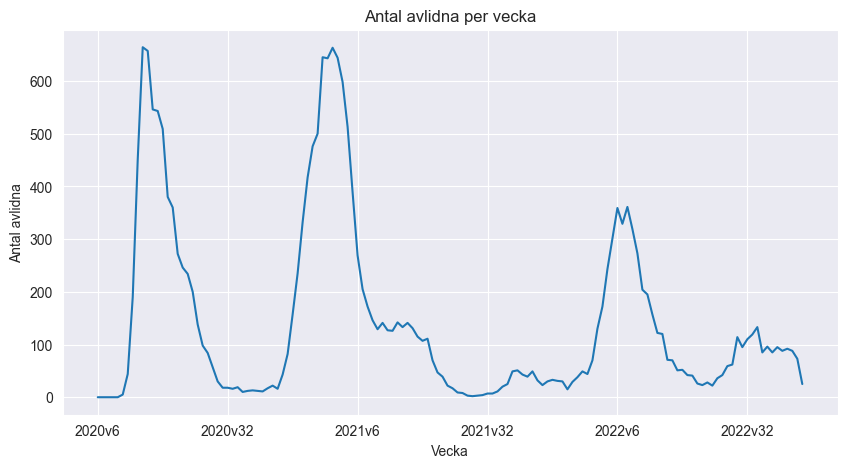

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")

weekly_deaths = sns.lineplot(data=covid19_cases, x="Vecka", y="Antal_avlidna_vecka")

# improve appearance of plot
weekly_deaths.set_title("Antal avlidna per vecka")
weekly_deaths.set_ylabel("Antal avlidna")
weekly_deaths.set_xticks (range(0, len(covid19_cases), 26))
weekly_deaths.set_xticklabels(["2020v6", "2020v32", "2021v6", "2021v32", "2022v6", "2022v32"])

# export plot as image
plt.savefig("./Visualiseringar/antal_avlidna_vecka.png")

In [29]:
import plotly_express as px

fig = px.line(covid19_cases.rename(columns={"Antal_avlidna_vecka": "Antal avlidna"}), 
              x="Vecka", y="Antal avlidna",
              hover_name="Vecka", hover_data={"Vecka": False},
              title="Antal avlidna per vecka")

fig.show()

# export graph as static web page
fig.write_html("./Visualiseringar/antal_avlidna_vecka.html")

### d)

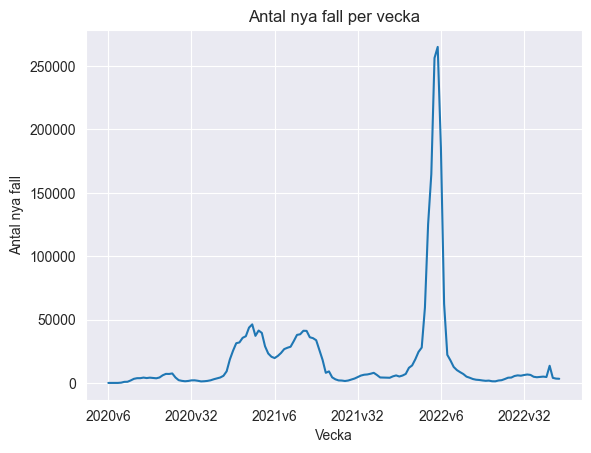

In [30]:
weekly_cases = sns.lineplot(data=covid19_cases, x="Vecka", y="Antal_fall_vecka")

# improve appearance of plot
weekly_cases.set_title("Antal nya fall per vecka")
weekly_cases.set_ylabel("Antal nya fall")
weekly_cases.set_xticks (range(0, len(covid19_cases), 26))
weekly_cases.set_xticklabels(["2020v6", "2020v32", "2021v6", "2021v32", "2022v6", "2022v32"])

# export plot as image
plt.savefig("./Visualiseringar/antal_fall_vecka.png")

In [31]:
fig = px.line(covid19_cases.rename(columns={"Antal_fall_vecka": "Antal fall"}), 
              x="Vecka", y="Antal fall",
              hover_name="Vecka", hover_data={"Vecka": False},
              title="Antal nya fall per vecka")

fig.show()

# export graph as static web page
fig.write_html("./Visualiseringar/antal_fall_vecka.html")